In [123]:
# #!/usr/bin/env python
# # -*- coding: utf-8 -*-

# HOST = "localhost"
# PORT = 4223
# SS1_UID = "6wVow5"
# # SS2_UID = "6CQ4nA"
# LC1_UID = 'KiG'
# # LC2_UID = 'Kgx'
# import time

# from tinkerforge.ip_connection import IPConnection
# from tinkerforge.brick_silent_stepper import BrickSilentStepper
# from tinkerforge.bricklet_load_cell_v2 import BrickletLoadCellV2
# import numpy as np
# from tqdm import tqdm
# import pandas as pd
# import time

# SAVE_FILENAME = "08.28.24_BL_Force_Paper3.csv"


# ipcon = IPConnection() # Create IP connection
# ss1 = BrickSilentStepper(SS1_UID, ipcon) # Create device object
# # ss2 = BrickSilentStepper(SS2_UID, ipcon) # Create device object
# lc1 = BrickletLoadCellV2(LC1_UID, ipcon) # Create device object
# # lc2 = BrickletLoadCellV2(LC2_UID, ipcon) # Create device object
# ipcon.connect(HOST, PORT) # Connect to brickd

In [124]:
# PITCH = 5  # millimeters / turn
# GEAR_RATIO = 1  # Assuming no gear ratio? https://www.omc-stepperonline.com/download/11HS12-0956D.pdf
# MICRO_STEPS_PER_REV, RESOLUTION_SETTING = (
#     256,
#     ss1.STEP_RESOLUTION_256,
# )  # 256 micro-steps per macro-step
# MACRO_STEPS_PER_REV = 200  # 200 macro-steps per revolution (1.8 degree step angle)
# STEPS_PER_REV = GEAR_RATIO * MACRO_STEPS_PER_REV * MICRO_STEPS_PER_REV
# FINAL_DISTANCE = 5  # mm
# MEASURE_FREQ = 0.1  # mm per measurement


# MAX_VELOCITY = 0.1  # mm / s
# MAX_STEPS_PER_SECOND = (
#     MAX_VELOCITY * STEPS_PER_REV
# ) / PITCH  # Velocity: steps / sec
# FINAL_STEPS = (FINAL_DISTANCE * STEPS_PER_REV) / PITCH
# MEASURE_FREQ_IN_STEPS = (STEPS_PER_REV * MEASURE_FREQ) / PITCH



In [125]:
# df = pd.DataFrame(columns = ['Time', 'Force (Newtons)', 'Distance (millimeters)'])

# ss1.enable() 
# ss1.set_current_position(0) # Initialize to 0
# ss1.set_motor_current(800) # 800 mA
# ss1.set_step_configuration(RESOLUTION_SETTING, True) # 1 / RESOLUTION_SETTING steps (interpolated)
# ss1.set_max_velocity(MAX_STEPS_PER_SECOND) # Velocity: steps/s
# ss1.set_speed_ramping(500, 5000) # Fast deacceleration (5000 steps/s^2) for stopping

# # Initialize Tar & Set Stepper position to 0
# lc1_tar = np.mean([lc1.get_weight() for i in range(1000)])
# # lc2_tar = np.mean([lc2.get_weight() for i in range(1000)])

# print(lc1_tar)

In [126]:
# # LETS RUN IT! NOTE: slapping on the negative sign sets the stepper to stretch
# ss1.set_steps(-FINAL_STEPS)


In [127]:
# from IPython.display import clear_output

# STARTING_TIME = time.time_ns() // 1_000_000
# total_steps, total_distance, total_time, total_newtons, idx = 0, 0, 0, 0, 0

# while total_distance < FINAL_DISTANCE:
#     total_steps = -ss1.get_current_position()
#     total_time = (time.time_ns() // 1_000_000) - STARTING_TIME
#     total_distance = total_steps / STEPS_PER_REV * PITCH
#     lc1_weight = lc1_tar - lc1.get_weight()  # gramspp
#     # lc2_weight = (lc2.get_weight()) - lc2_tar
#     # NOTE: Yitong calibrated the load cells to 10,000x
#     # sensitivity.... (with a 50gram weight said it was 500000 grams)
#     # total_weight = (lc1_weight + lc2_weight) / 10000
#     total_weight = (lc1_weight ) / 10000

#     # TODO: DOES THIS COME OUT IN GRAMS?
#     total_newtons = -total_weight / 1000 * 9.80665  # m/s^2
#     clear_output(wait=True)  # Clear the previous output

#     display(
#         f"time {total_time:.0f}, lc1_weight {lc1_weight:.1f}, Total Time {total_time:.1f}, Total Weight {total_weight:.5f}, Total Newtons {total_newtons:.5f}"
#     )

#     # display(f'{idx} Total Distance {total_distance:.5f}, Total Force {total_newtons:.5f}, Total Time {total_time:.5f}')

#     # Create a new row as a DataFrame
#     new_row = pd.DataFrame(
#         {
#             "Time": [total_time],
#             "Distance (millimeters)": [total_distance],
#             "Force (Newtons)": [total_newtons],
#         }
#     )

#     # Use pd.concat to add the new row to the existing DataFrame
#     df = pd.concat([df, new_row], ignore_index=True)

#     # time.sleep(0.01)
#     # clear_output(wait=True)
#     df.to_csv(SAVE_FILENAME)

In [128]:
# time.sleep(2) # Wait for motor to actually stop
# ss1.disable()
# ipcon.disconnect()

In [129]:
# break

In [130]:
# df.to_csv(SAVE_FILENAME)
# df

In [131]:
# filename = SAVE_FILENAME
# # filename = '08.27.24_BL_Force_PaperSheetControl2.csv'
# # filename = '08.27.24_BL_Force_Linseed1.csv'

# df = pd.read_csv(f'/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/{filename}')

paper thickness 0.092mm
linseed 0.0159
coconut 0.155
shellac 0.185
 raw 0.139

In [132]:
# import plotly.express as px
# import matplotlib.pyplot as plt

# # df['Distance (millimeters)'] = -df['Distance (millimeters)']
# # df['Force (newtons))'] = -df['Force (newtons)']
# fig = px.line(
#     df,
#     x="Distance (millimeters)",
#     y="Force (Newtons)",
#     title=f"Force / Distance of {filename}",
# )
# fig.show()


In [133]:
# # Caluculate Strain!
# if filename == '08.27.24_BL_Force_PaperSheetControl2.csv':
#     init_distance, final_distance = 0.30068, 1.224316
#     final_force = 26.33117
#     cross_sectional_area = (10 * 0.099) / 10**6 # mm^2 turned into m^2
#     total_length = 40 - 24 # The length of the starting strip is 40, the claws are each 12 mm
# elif filename == '08.27.24_BL_Force_Linseed1.csv':
#     init_distance, final_distance = 0.7867188, 1.234961
#     final_force = 27.1617
#     cross_sectional_area = (10 * 0.164) / 10**6 # mm^2 turned into m^2
#     total_length = 40 - 24 # The length of the starting strip is 40, the claws are each 12 mm
# elif filename == '08.28.24_BL_Force_Linseed2.csv':
#     init_distance, final_distance = 0.7867188, 0.6639
    
#     final_force = 27.1617
#     cross_sectional_area = (10 * 0.164) / 10**6 # mm^2 turned into m^2
#     total_length = 40 - 24 # The length of the starting strip is 40, the claws are each 12 mm
# elif filename == '08.28.24_BL_Force_Coconut1.csv':
#     init_distance, final_distance = 0.5395508, 1.099902
#     final_force = 34.3145
#     cross_sectional_area = (10 * 0.208) / 10**6 # mm^2 turned into m^2
#     total_length = 40 - 24 # The length of the starting strip is 40, the claws are each 12 mm


# filtered_df = df[
#     (df["Distance (millimeters)"] >= init_distance)
#     & (df["Distance (millimeters)"] <= final_distance)
# ]

# # Calculate strain for the filtered DataFrame
# filtered_df["Strain (%)"] = (
#     (filtered_df["Distance (millimeters)"] - init_distance) / total_length
# )
# # Calculate strain for the filtered DataFrame
# filtered_df["Stress (MPa)"] = (
#     filtered_df["Force (Newtons)"] / (cross_sectional_area * 1000000000)
# )
# # filtered_df

In [134]:
# import plotly.express as px
# import matplotlib.pyplot as plt

# fig = px.line(
#     filtered_df,
#     x="Strain (%)",
#     y="Stress (MPa)",
#     title=f"Stress / Strain of {filename}",
# )
# fig.show()


In [135]:
# if filename == '08.27.24_BL_Force_PaperSheetControl2.csv':
#     init_strain, init_stress = 0, 0
#     final_strain, final_stress = 0.036749, 0.02663001
# elif filename == '08.27.24_BL_Force_Linseed1.csv':
#     init_strain, init_stress = 0.001977536, 0.0016626
#     final_strain, final_stress = 0.0232727, 0.01656201
# elif filename == '08.28.24_BL_Force_Coconut1.csv':
#     print('we in here?')
#     init_strain, init_stress = 0.01808494, 0.004345046
#     final_strain, final_stress = 0.04569725, 0.03428968


In [136]:
# filtered_df['Delta Strain (%)'] = filtered_df['Strain (%)'].diff()
# # Use the trapezoidal rule to calculate the area under the curve
# # This gives you the "toughness" in terms of energy per unit area (Joules per square meter, for instance)
# filtered_df['Trapezoid Area (J/m^3)'] = 0.5 * (filtered_df['Stress (MPa)'] + filtered_df['Stress (MPa)'].shift(1)) * filtered_df['Delta Strain (%)']
# # Replace NaN values (from the shift operation) with 0
# filtered_df['Trapezoid Area (J/m^3)'].fillna(0, inplace=True)
# total_toughness = filtered_df['Trapezoid Area (J/m^3)'].sum() 
# total_toughness

In [137]:
# # Sum the areas to get the total toughness
# print(f'Peak Force (N) {final_force:.4f} Total Toughness: {total_toughness:.6f} J/m^3')
# print(f'Failure Strain {final_strain:.4f} Peak Stress (GPa) {final_stress:.4f}')

# youngs_modulus = (final_stress - init_stress) / (final_strain - init_strain)
# print(f"Young's Modulus {youngs_modulus:.4f} GPa")

### Linseed 1
Peak Force (N) 27.1617 Total Toughness: 0.000218 J/m^3
Failure Strain 0.0233 Peak Stress (GPa) 0.0166
Young's Modulus 0.6997 GPa

### Coconut 1
Peak Force (N) 34.3145 Total Toughness: 0.000286 J/m^3
Failure Strain 0.0457 Peak Stress (GPa) 0.0343
Young's Modulus 1.0845 GPa


# Lets' do the aggregate garph

In [138]:
trials = [
    # ('coconut_1', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Coconut1.csv'),
    # ('coconut_2', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Coconut2.csv'),
    # ('coconut_3', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Coconut3.csv'),
    ('coconut_4', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Coconut4.csv'),
    ('coconut_5', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Coconut5.csv'),
    ('coconut_6', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Coconut6.csv'),
    ('untreated_1', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Control1.csv'),
    ('untreated_2', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Control2.csv'),
    # ('untreated_3', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Control3.csv'),
    ('untreated_4', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Control4.csv'),
    ('linseed_1', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Linseed1.csv'),
    ('linseed_2', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Linseed2.csv'),
    # ('linseed_3', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Linseed3.csv'),
    ('linseed_4', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Linseed4.csv'),
    # ('paper_1', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Paper1.csv'),
    # ('paper_2', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Paper2.csv'),
    # ('paper_3', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Paper3.csv'),
    ('shellac_1', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Shellak1.csv'),
    ('shellac_2', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Shellak2.csv'),
    ('shellac_3', '/Users/yitong/Documents/GitHub/ethical_necromancy/Bacterial_BioReactor/08.28.24_BL_Force_Shellak3.csv'),
]

In [139]:
thickness_lookup = {
    "paper": 0.092,
    "linseed": 0.159,
    "coconut": 0.155,
    "shellac": 0.185,
    "untreated": 0.139,
}
time_windows = {
    "coconut_4": (0.6166992, 1.684375),
    "coconut_5": (0.387793, 1.244238),
    "coconut_6": (0.3592773, 1.058301),
    "untreated_1": (0.2225586, 0.8293945),
    "untreated_2": (0.3905273, 1.133887),
    "untreated_4": (0.5355469, 2.118262),
    "linseed_1": (0, 1.005957),
    "linseed_2": (0.1554688, 1.356641),
    "linseed_4": (0.2974609, 0.8547852),
    # "paper_1": (0.1569336, 1.246094),
    # "paper_2": (0.2026367, 1.374609),
    # "paper_3": (0.212793, 1.188574),
    "shellac_1": (0.012597666, 0.8857422),
    "shellac_2": (0.09707031, 0.796582),
    "shellac_3": (0.01425781, 0.8194336),
}

In [140]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import time

aggregate_metrics_df = pd.DataFrame()
all_data = []


for name, trial_file in trials:
    init_distance, final_distance = time_windows[name]
    # The length of the starting strip is 40, the claws are each 12 mm
    total_length = 40 - 24

    trial_type = name.split("_")[0]
    thickness = thickness_lookup[trial_type]
    cross_sectional_area = (10 * thickness) / 10**6  # mm^2 turned into m^2

    df = pd.read_csv(trial_file)
    df = df[
        (df["Distance (millimeters)"] >= init_distance)
        & (df["Distance (millimeters)"] <= final_distance)
    ]
    peak_force = df["Force (Newtons)"].max()

    # Calculate strain for the filtered DataFrame
    df["Strain (%)"] = (df["Distance (millimeters)"] - init_distance) / total_length
    # Calculate strain for the filtered DataFrame
    df["Stress (MPa)"] = df["Force (Newtons)"] / (cross_sectional_area * 1000000000)

    df["Delta Strain (%)"] = df["Strain (%)"].diff()
    # Use the trapezoidal rule to calculate the area under the curve
    # This gives you the "toughness" in terms of energy per unit area (Joules per square meter, for instance)
    df["Trapezoid Area (J/m^3)"] = (
        0.5
        * (df["Stress (MPa)"] + df["Stress (MPa)"].shift(1))
        * df["Delta Strain (%)"]
    )
    # Replace NaN values (from the shift operation) with 0
    df["Trapezoid Area (J/m^3)"].fillna(0, inplace=True)
    total_toughness = df["Trapezoid Area (J/m^3)"].sum()

    init_stress, init_strain = (
        df.iloc[0]["Stress (MPa)"],
        df.iloc[0]["Strain (%)"],
    )
    final_stress, final_strain = (
        df[df["Stress (MPa)"] == df["Stress (MPa)"].max()]["Stress (MPa)"].iloc[0],
        df[df["Stress (MPa)"] == df["Stress (MPa)"].max()]["Strain (%)"].iloc[0],
    )
    youngs_modulus = (final_stress - init_stress) / (final_strain - init_strain)
    print(
        f"{name} Peak Force (N) {peak_force:.4f} Total Toughness: {total_toughness:.6f} J/m^3"
    )
    print(f"Failure Strain {final_strain:.4f} Peak Stress (GPa) {final_stress:.4f}")
    print(f"Young's Modulus {youngs_modulus:.4f} GPa")

    # Add trial names
    df["Trial Name"] = name
    df["Trial Type"] = trial_type

    metrics = {
        "Trial Name": name,
        "Trial Type": trial_type,
        "Peak Force (N)": peak_force,
        "Total Toughness (J/m^3)": total_toughness,
        "Failure Strain (%)": final_strain,
        "Peak Stress (MPa)": final_stress,
        "Young's Modulus (GPa)": youngs_modulus,
    }
    temp_df = pd.DataFrame([metrics])
    aggregate_metrics_df = pd.concat([aggregate_metrics_df, temp_df], ignore_index=True)

    all_data.append(df)

coconut_4 Peak Force (N) 59.4355 Total Toughness: 0.001510 J/m^3
Failure Strain 0.0626 Peak Stress (GPa) 0.0383
Young's Modulus 0.5536 GPa
coconut_5 Peak Force (N) 49.4119 Total Toughness: 0.000864 J/m^3
Failure Strain 0.0491 Peak Stress (GPa) 0.0319
Young's Modulus 0.6143 GPa
coconut_6 Peak Force (N) 42.2749 Total Toughness: 0.000626 J/m^3
Failure Strain 0.0398 Peak Stress (GPa) 0.0273
Young's Modulus 0.6420 GPa
untreated_1 Peak Force (N) 28.7087 Total Toughness: 0.000360 J/m^3
Failure Strain 0.0340 Peak Stress (GPa) 0.0207
Young's Modulus 0.5820 GPa
untreated_2 Peak Force (N) 41.1636 Total Toughness: 0.000711 J/m^3
Failure Strain 0.0423 Peak Stress (GPa) 0.0296
Young's Modulus 0.6893 GPa
untreated_4 Peak Force (N) 20.9644 Total Toughness: 0.000666 J/m^3
Failure Strain 0.0454 Peak Stress (GPa) 0.0151
Young's Modulus 0.3177 GPa
linseed_1 Peak Force (N) 58.7368 Total Toughness: 0.001201 J/m^3
Failure Strain 0.0584 Peak Stress (GPa) 0.0369
Young's Modulus 0.6324 GPa
linseed_2 Peak Force 

/var/folders/1j/7hbmv0v92x141ltlqxmr9dzw0000gn/T/ipykernel_2106/1295247275.py:40: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/1j/7hbmv0v92x141ltlqxmr9dzw0000gn/T/ipykernel_2106/1295247275.py:40: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [141]:
# Calculate averages and standard deviations per trial_type
metrics_summary = aggregate_metrics_df.groupby("Trial Type").agg(
    {
        "Peak Force (N)": ["mean", "std"],
        "Total Toughness (J/m^3)": ["mean", "std"],
        "Failure Strain (%)": ["mean", "std"],
        "Peak Stress (MPa)": ["mean", "std"],
        "Young's Modulus (GPa)": ["mean", "std"]
    }
).reset_index()

metrics_summary.columns = [' '.join(col).strip() for col in metrics_summary.columns.values]
metrics_summary

,Trial Type,Peak Force (N) mean,Peak Force (N) std,Total Toughness (J/m^3) mean,Total Toughness (J/m^3) std,Failure Strain (%) mean,Failure Strain (%) std,Peak Stress (MPa) mean,Peak Stress (MPa) std,Young's Modulus (GPa) mean,Young's Modulus (GPa) std
0,coconut,50.374104,8.620623,0.001000,0.000457,0.050515,0.011439,0.032499,0.005562,0.603320,0.045246
1,linseed,48.113344,17.773122,0.000943,0.000587,0.053233,0.020876,0.030260,0.011178,0.559694,0.067129
2,shellac,43.391286,9.910001,0.000611,0.000221,0.045864,0.005411,0.023455,0.005357,0.505746,0.064103
3,untreated,30.278910,10.190733,0.000579,0.000191,0.040576,0.005918,0.021783,0.007331,0.529692,0.191264


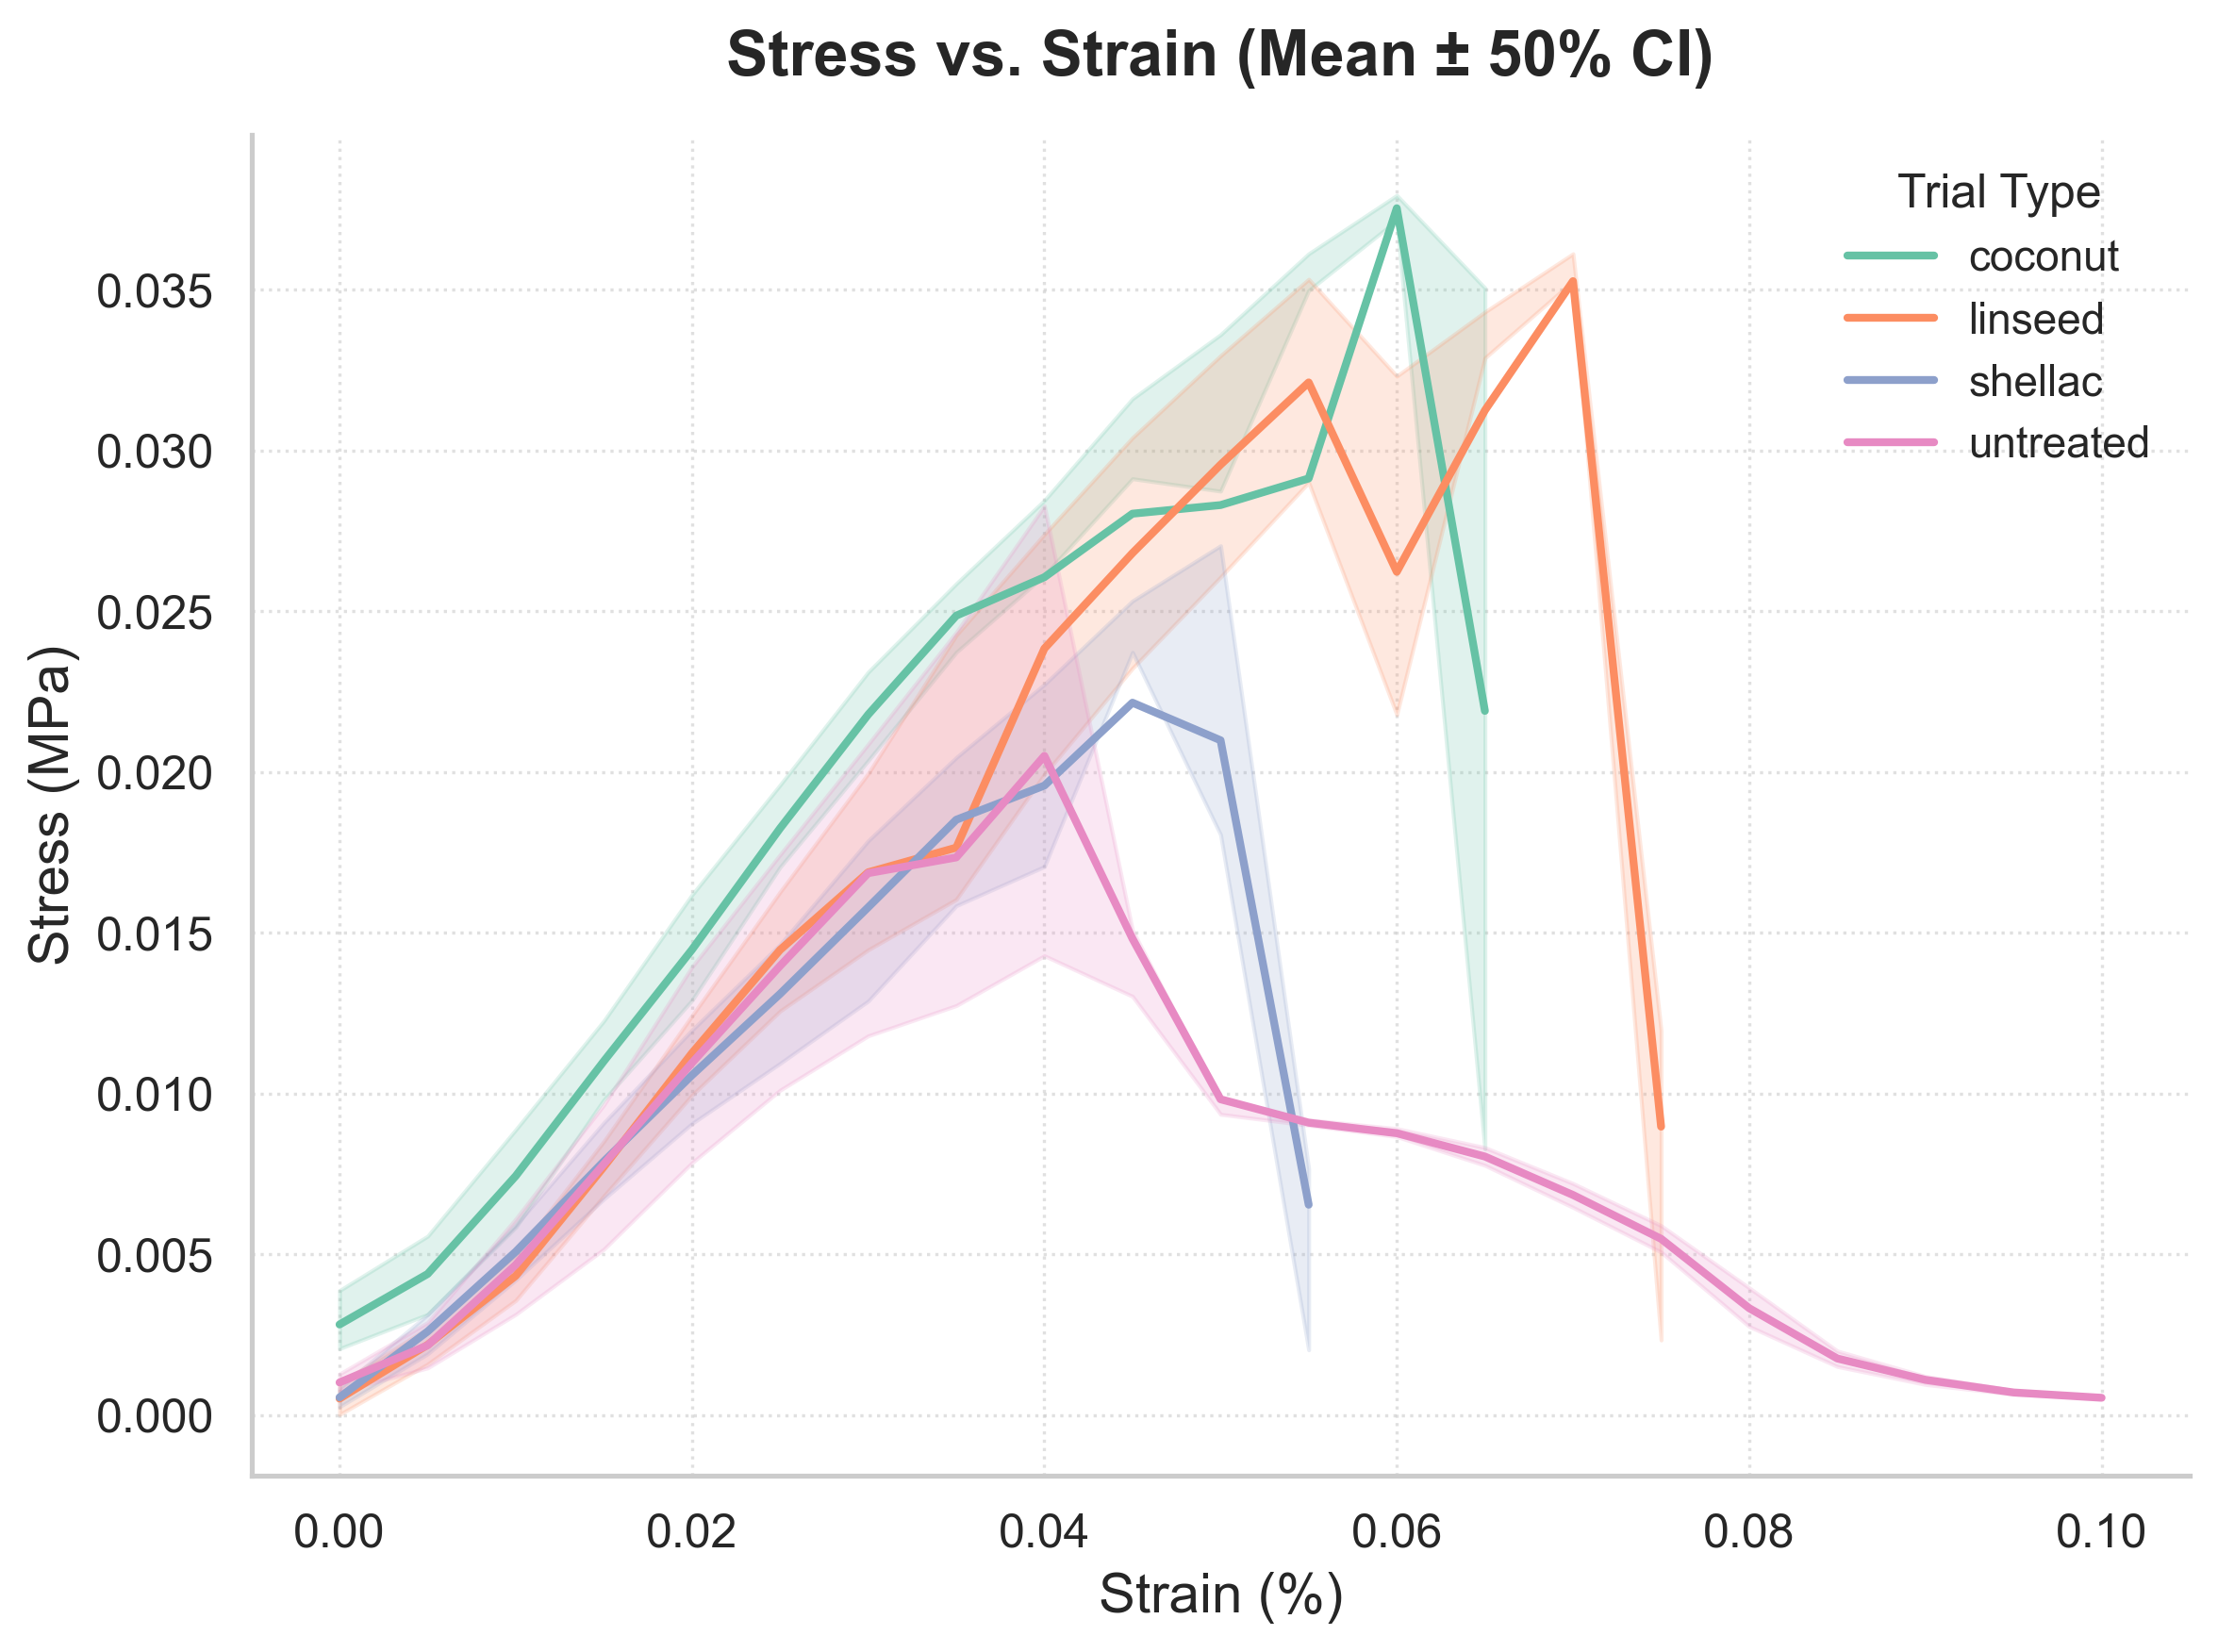

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Combine all dataframes
combined_df = pd.concat(all_data)

# Set style
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Choose a color palette
palette = sns.color_palette("Set2", n_colors=combined_df["Trial Type"].nunique())

for i, (trial_type, group) in enumerate(combined_df.groupby("Trial Type")):
    # Sort by x to ensure smooth plotting
    group = group.sort_values("Strain (%)")

    # Bin at small intervals for smoothing
    bin_width = 0.005
    group["Strain_bin"] = (group["Strain (%)"] / bin_width).round() * bin_width
    
    agg_df = group.groupby("Strain_bin").agg(
        mean_stress=("Stress (MPa)", "mean"),
        lower_CI=("Stress (MPa)", lambda x: np.percentile(x, 25)),  # 25th percentile
        upper_CI=("Stress (MPa)", lambda x: np.percentile(x, 75))   # 75th percentile
    ).reset_index()

    # Mean curve
    ax.plot(
        agg_df["Strain_bin"],
        agg_df["mean_stress"],
        color=palette[i],
        linewidth=2.0,
        label=trial_type
    )

    # 50% CI shaded band
    ax.fill_between(
        agg_df["Strain_bin"],
        agg_df["lower_CI"],
        agg_df["upper_CI"],
        color=palette[i],
        alpha=0.2
    )

# Labels & style
ax.set_title("Stress vs. Strain (Mean ± 50% CI)", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Strain (%)", fontsize=14)
ax.set_ylabel("Stress (MPa)", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

sns.despine()
ax.grid(True, which='major', linestyle=':', linewidth=0.8, alpha=0.6)
ax.legend(title="Trial Type", fontsize=11, title_fontsize=12, frameon=False, loc="best")

plt.tight_layout()
plt.show()


In [143]:
combined_df

,Unnamed: 0,Time,Force (Newtons),Distance (millimeters),Strain (%),Stress (MPa),Delta Strain (%),Trapezoid Area (J/m^3),Trial Name,Trial Type
759,759,7296,5.728279,0.616699,1.171875e-09,0.003696,NaN,0.000000e+00,coconut_4,coconut
760,760,7307,5.864977,0.617773,6.713984e-05,0.003784,0.000067,2.510825e-07,coconut_4,coconut
761,761,7317,6.004431,0.618750,1.281750e-04,0.003874,0.000061,2.336939e-07,coconut_4,coconut
762,762,7327,6.004431,0.619824,1.953137e-04,0.003874,0.000067,2.600836e-07,coconut_4,coconut
763,763,7337,6.004431,0.620703,2.502453e-04,0.003874,0.000055,2.127957e-07,coconut_4,coconut
...,...,...,...,...,...,...,...,...,...,...
928,928,9279,2.384380,0.814844,5.003662e-02,0.001289,0.000067,1.515468e-07,shellac_3,shellac
929,929,9291,2.384380,0.816113,5.011597e-02,0.001289,0.000079,1.022650e-07,shellac_3,shellac
930,930,9303,2.384380,0.817285,5.018921e-02,0.001289,0.000073,9.439850e-08,shellac_3,shellac
931,931,9313,2.384380,0.818262,5.025024e-02,0.001289,0.000061,7.866542e-08,shellac_3,shellac


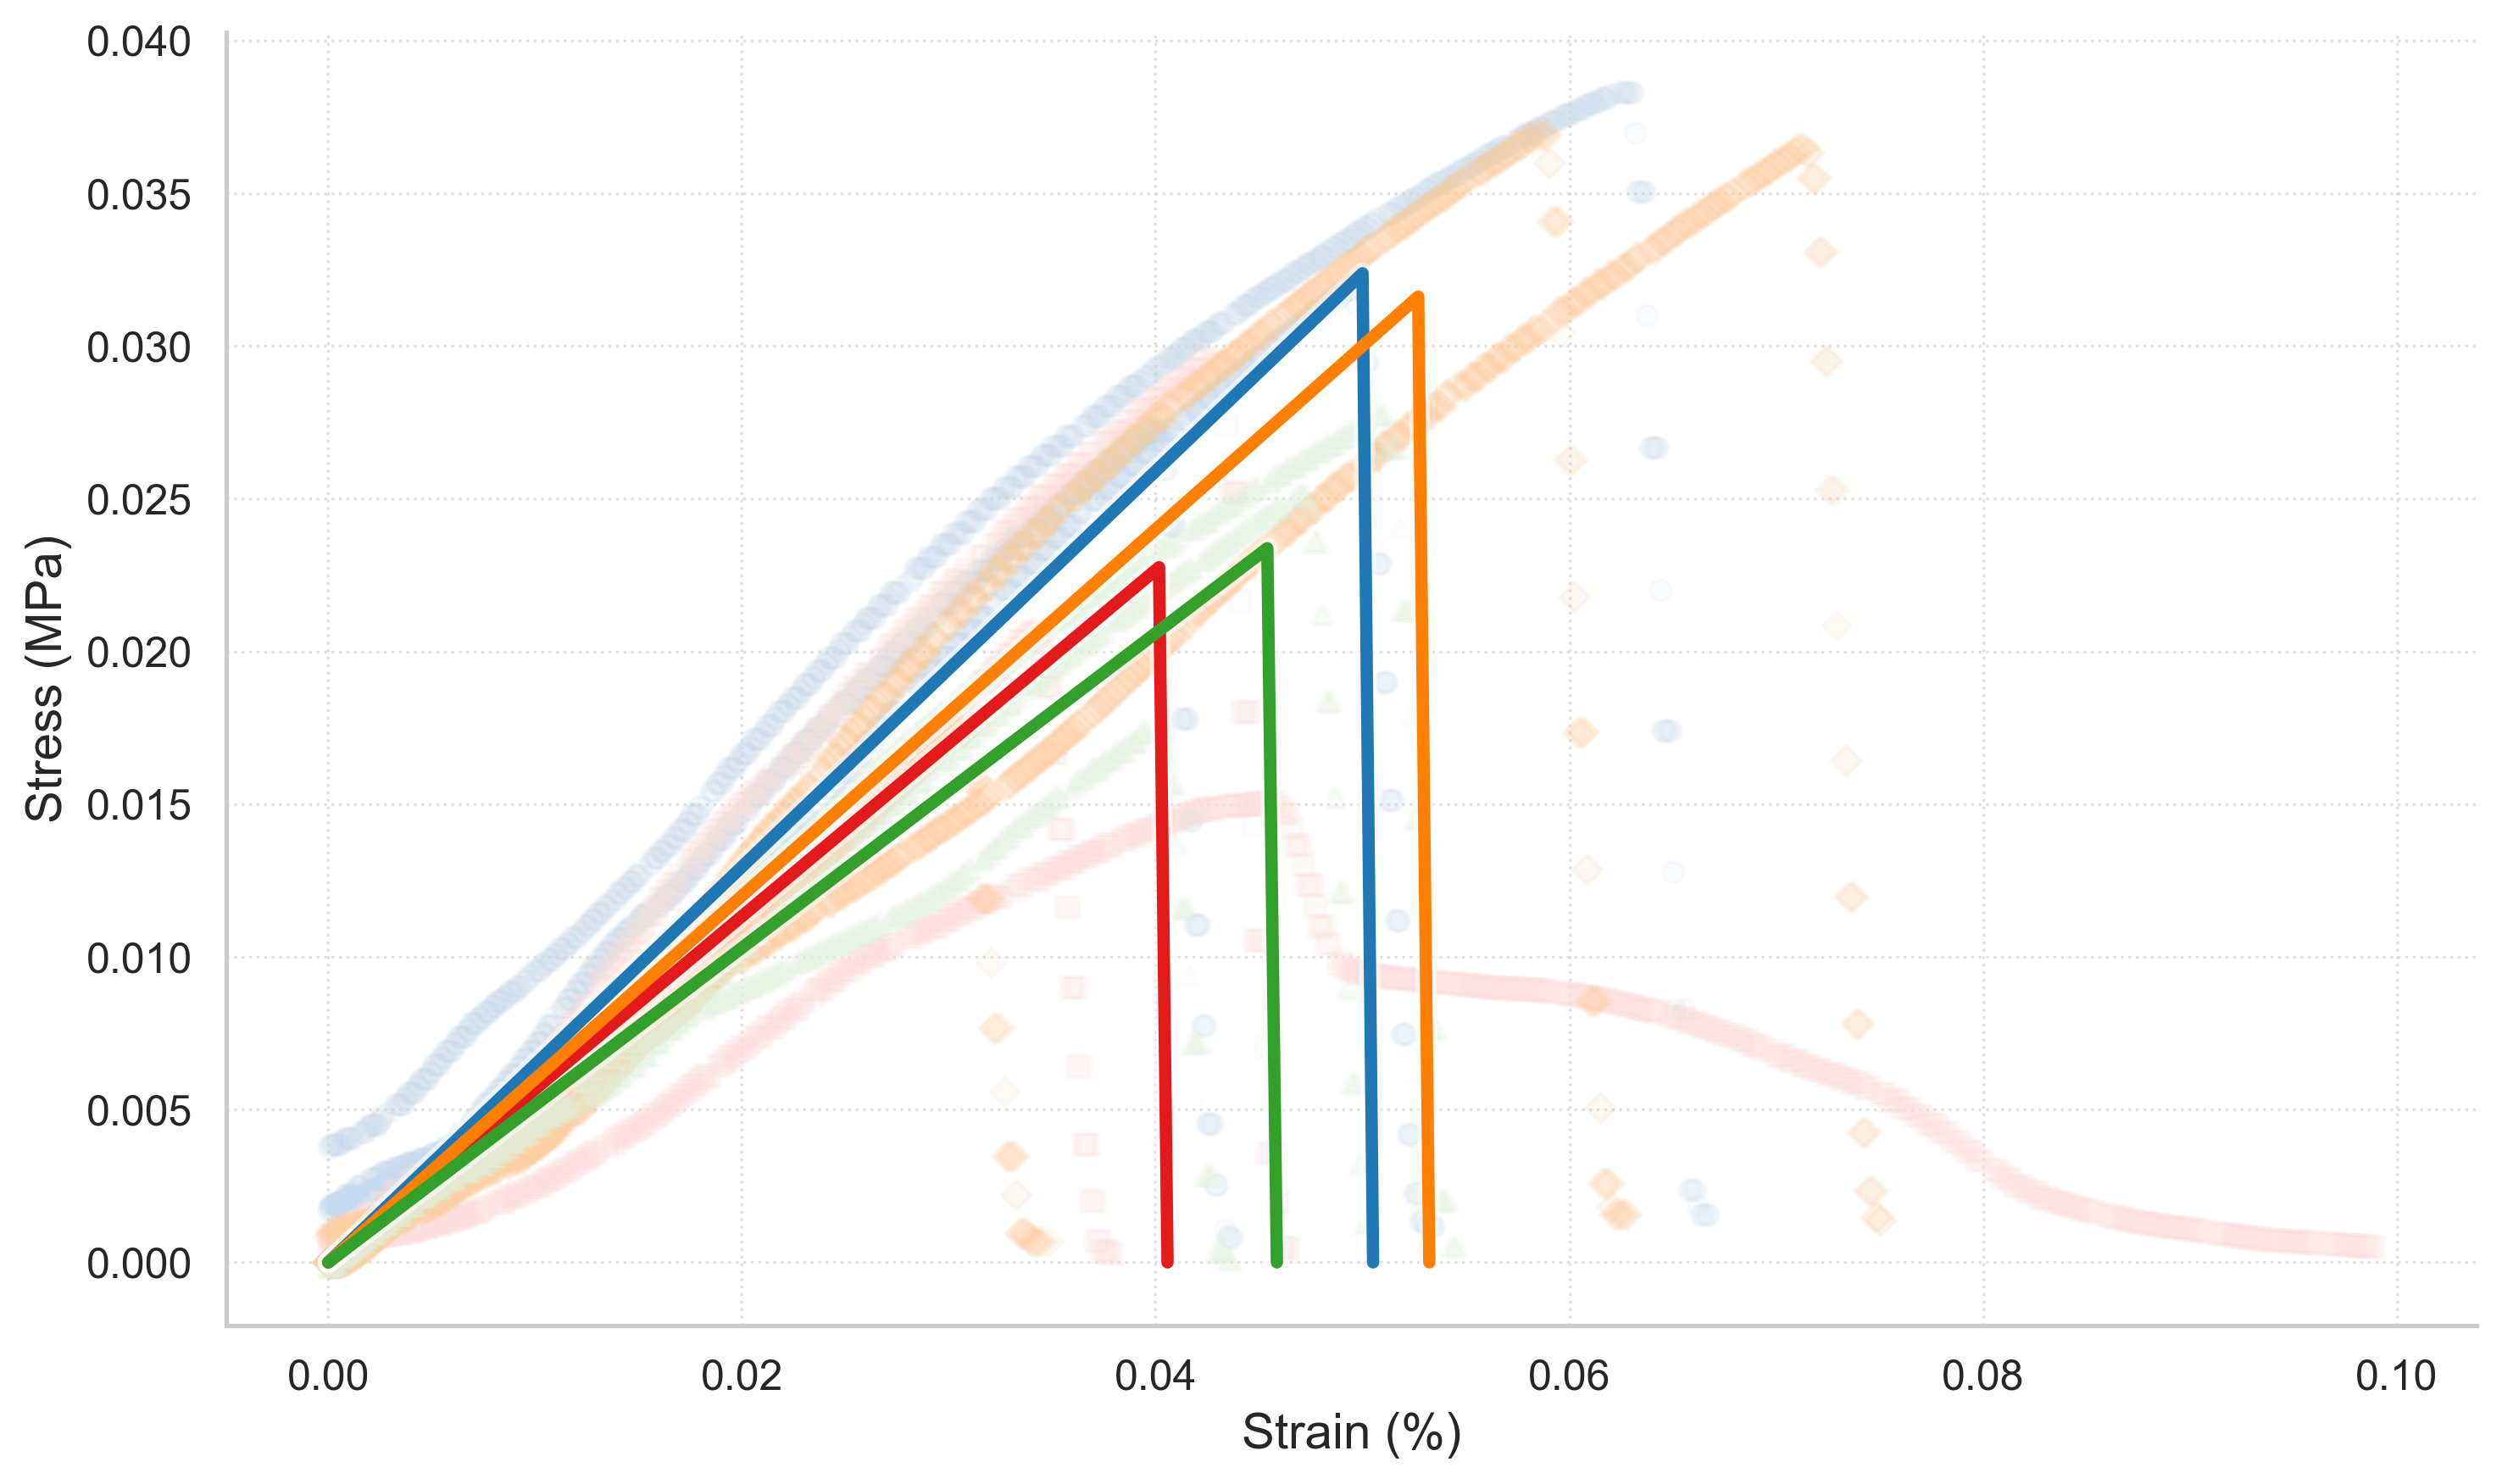

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Combine all dataframes
combined_df = pd.concat(all_data)

# Unique trial types
trial_types = combined_df["Trial Type"].unique()

# Set theme
sns.set_theme(style="whitegrid")

# Figure
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

point_colors = ["#c6dbef", "#fde0dd", "#fdd0a2", "#e5f5e0"]  
line_colors  = ["#1f78b4", "#e31a1c", "#ff7f00", "#33a02c"]  

color_map_points = dict(zip(trial_types, point_colors))
color_map_lines  = dict(zip(trial_types, line_colors))

# Marker styles
markers = ["o", "s", "D", "^", "v", "<", ">", "P", "X"]

# Plot each condition
for i, trial_type in enumerate(trial_types):
    group = combined_df[combined_df["Trial Type"] == trial_type]

    # Scatter points (light & transparent)
    ax.scatter(group["Strain (%)"], group["Stress (MPa)"],
               color=color_map_points[trial_type], alpha=0.08,
               marker=markers[i % len(markers)], label=f"{trial_type} data", zorder=5)

    # Fit lines for each replicate
    slopes = []
    max_strains = []

    for trial_name, trial_data in group.groupby("Trial Name"):
        x = trial_data["Strain (%)"].values
        y = trial_data["Stress (MPa)"].values

        # Elastic region
        idx_max = np.argmax(y)
        x_elastic = x[:idx_max+1].reshape(-1, 1)
        y_elastic = y[:idx_max+1]

        # Linear regression
        model = LinearRegression().fit(x_elastic, y_elastic)
        slopes.append(model.coef_[0])
        max_strains.append(x[idx_max])

    # Average slope and strain
    avg_slope = np.mean(slopes)
    avg_strain = np.mean(max_strains)

    # Representative line
    x_line = np.linspace(0, avg_strain, 100)
    y_line = avg_slope * x_line
    y_line[-1] = 0  # drop at failure

    # Halo effect (subtle white glow)
    ax.plot(x_line, y_line, color='white', linewidth=6, alpha=0.5, zorder=8)
    # Main line (bold, darker color)
    ax.plot(x_line, y_line, color=color_map_lines[trial_type], linewidth=3.5, zorder=10, label=f"{trial_type} fit")

# Style
# ax.set_title("Stress vs. Strain: Linear Fits by Condition", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Strain (%)", fontsize=14)
ax.set_ylabel("Stress (MPa)", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
sns.despine()

plt.tight_layout()
# plt.legend(frameon=False)
plt.show()


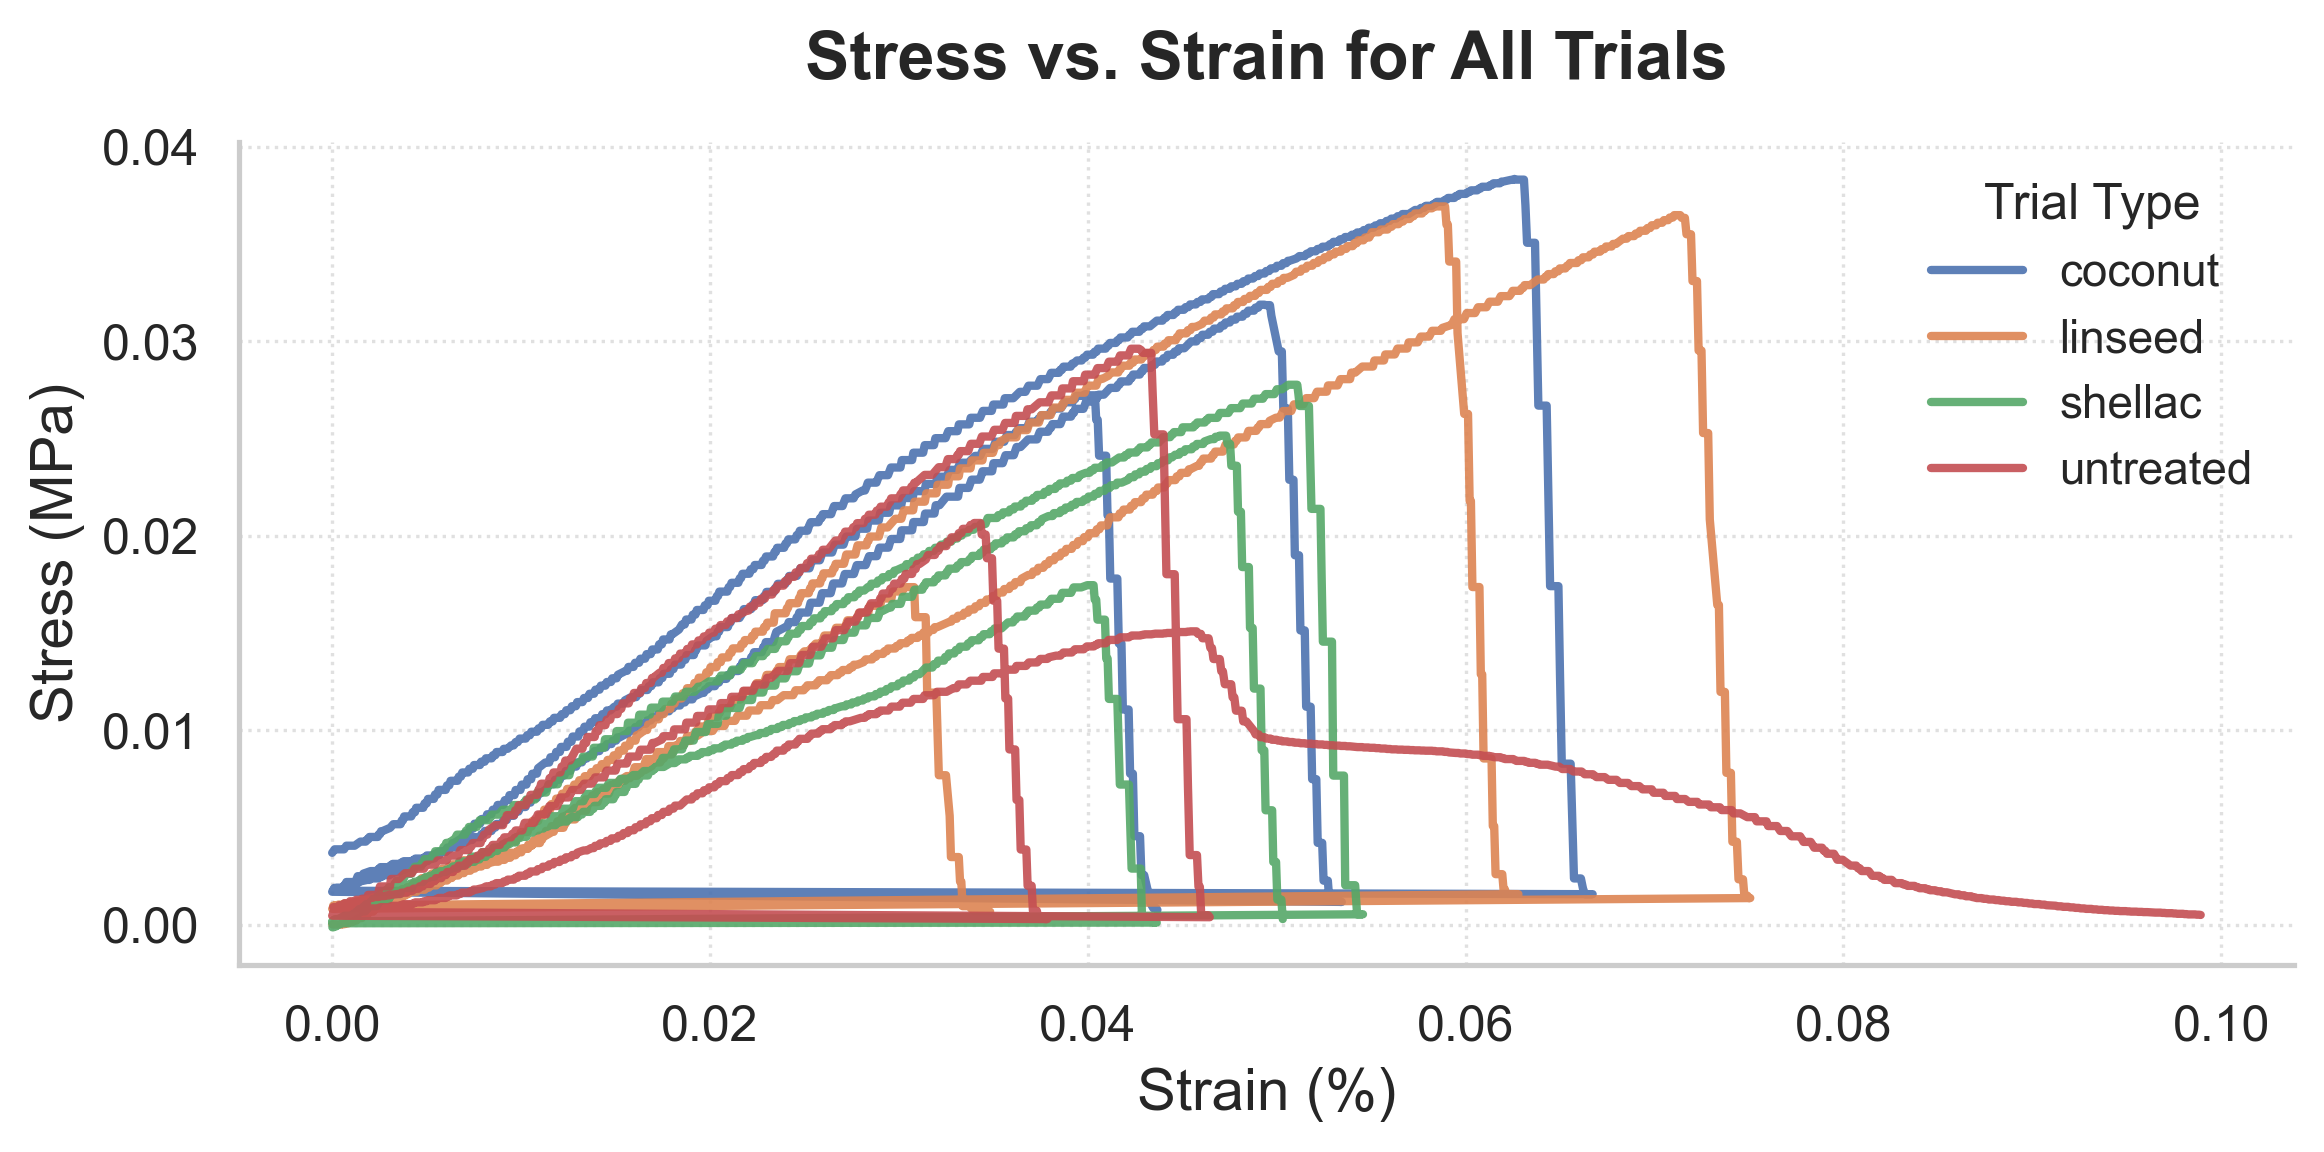

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine all dataframes
combined_df = pd.concat(all_data)

# Set a clean style
sns.set_theme(style="whitegrid")

# Create the figure
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

# Define a nice color palette
palette = sns.color_palette("Set2", n_colors=combined_df["Trial Type"].nunique())

# Plot each trial type
for trial_type, group in combined_df.groupby("Trial Type"):
    ax.plot(
        group["Strain (%)"],
        group["Stress (MPa)"],
        label=trial_type,
        linewidth=2.0,
        alpha=0.9
    )

# Style tweaks
ax.set_title("Stress vs. Strain for All Trials", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Strain (%)", fontsize=14)
ax.set_ylabel("Stress (MPa)", fontsize=14)

# Tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

# Legend styling
legend = ax.legend(title="Trial Type", fontsize=11, title_fontsize=12, frameon=False, loc="best")

# Remove the top and right spines for a cleaner look
sns.despine()

# Optional: light dotted grid
ax.grid(True, which='major', linestyle=':', linewidth=0.8, alpha=0.6)

plt.tight_layout()
plt.show()


In [150]:
# Combine all dataframes into one
combined_df = pd.concat(all_data)

# Plot using Plotly
fig = px.line(
    combined_df,
    x="Strain (%)", # x = 'Distance (millimeters)',
    y="Stress (MPa)", # y = 'Force (Newtons)', 
    color="Trial Type",
    title="Stress vs. Strain for All Trials",
    labels={"Strain (%)": "Strain (%)", "Stress (MPa)": "Stress (MPa)"},
)

fig.update_layout(
    legend_title_text="Trial Type", legend=dict(x=1.05, y=1, traceorder="normal")
)

fig.show()